<b>1</b> OBTENCIÓN DE DATOS

In [17]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> pre PROCESAMIENTO DE DATA

In [18]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data, True)

VolumenImage : 2.963 
altura : 174.000 
VolumenImage : 2.255 
altura : 184.000 
VolumenImage : 2.666 
altura : 171.000 
VolumenImage : 1.361 
altura : 133.000 
VolumenImage : 1.429 
altura : 168.000 
VolumenImage : 0.827 
altura : 130.000 
VolumenImage : 2.304 
altura : 167.000 
VolumenImage : 1.886 
altura : 186.000 
VolumenImage : 1.133 
altura : 135.000 
VolumenImage : 1.533 
altura : 120.000 
VolumenImage : 0.802 
altura : 135.000 
VolumenImage : 1.124 
altura : 120.000 
VolumenImage : 1.653 
altura : 155.000 
VolumenImage : 1.227 
altura : 120.000 
VolumenImage : 2.347 
altura : 175.000 
VolumenImage : 1.813 
altura : 163.000 
VolumenImage : 1.000 
altura : 140.000 
VolumenImage : 1.200 
altura : 150.000 
VolumenImage : 1.194 
altura : 153.000 
VolumenImage : 3.098 
altura : 195.000 
VolumenImage : 1.144 
altura : 145.000 
VolumenImage : 1.081 
altura : 150.000 
VolumenImage : 0.770 
altura : 149.000 
VolumenImage : 0.845 
altura : 123.000 
VolumenImage : 0.791 
altura : 115.000 


3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

373
                 yields      ndvi  volImage   volCalc  areaCalc  areaImage  \
yields         1.000000  0.493291  0.706488  0.701198  0.516795   0.644988   
ndvi           0.493291  1.000000  0.398165  0.420371  0.328794   0.415577   
volImage       0.706488  0.398165  1.000000  0.968167  0.637683   0.951090   
volCalc        0.701198  0.420371  0.968167  1.000000  0.678707   0.966066   
areaCalc       0.516795  0.328794  0.637683  0.678707  1.000000   0.640605   
areaImage      0.644988  0.415577  0.951090  0.966066  0.640605   1.000000   
hImage         0.504954  0.164466  0.685404  0.568382  0.391148   0.451072   
hMed           0.576524  0.304511  0.694521  0.764957  0.599895   0.599245   
dataIafNdvi    0.533571  0.429618  0.518569  0.501687  0.374849   0.459096   
maxRed         0.648260  0.526981  0.617897  0.627181  0.439392   0.614893   
minRed        -0.014793  0.377154 -0.248836 -0.255845 -0.207623  -0.222953   
maxBlue        0.639422  0.566231  0.611173  0.624394  0.424

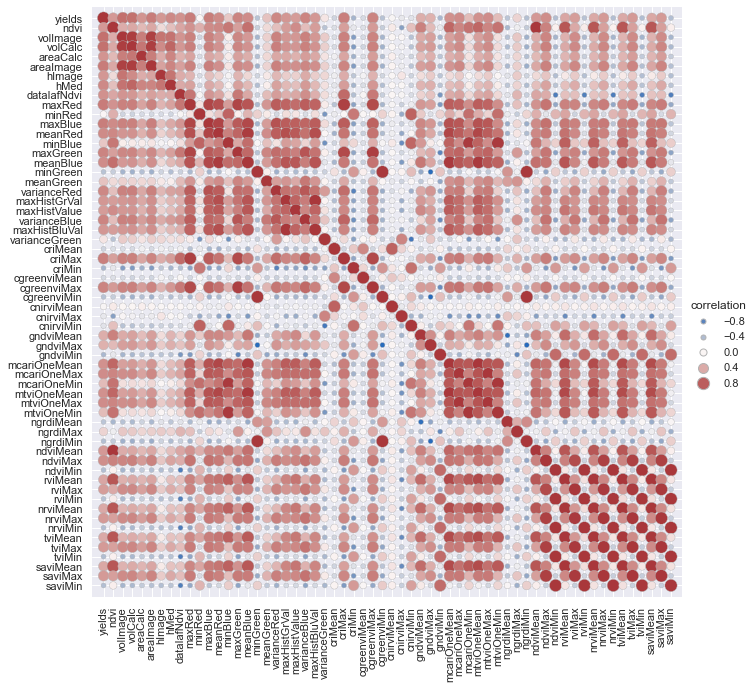

In [19]:
print(len(datos.datosYeld))
correlation=[]
correlation=dataframe.corr(method="pearson")
print(correlation)
sns.set(font_scale=1)
corr_mat = dataframe.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(25, 150), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

GRAFICAS ENTRE VARIABLES

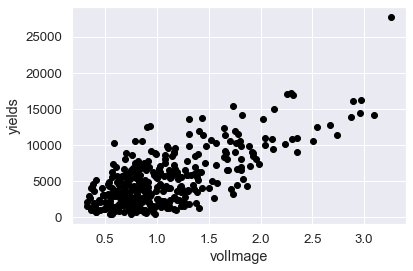

AttributeError: 'Series' object has no attribute 'length'

In [35]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataframe["volImage"],dataframe["yields"],c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("yields")

pyplot.show()

print(np.sum(dataframe["yields"])/dataframe["yields"].length)

<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


<AxesSubplot:>

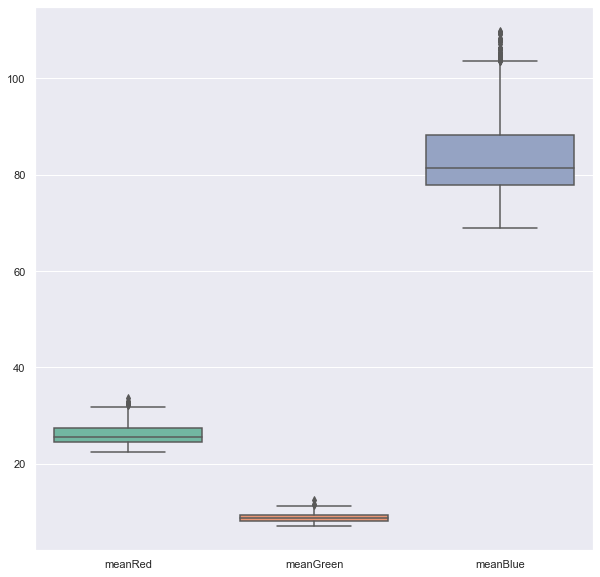

In [21]:

from sklearn.preprocessing import StandardScaler

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)
IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"latArea":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)

scaled_features = StandardScaler().fit_transform(dframeFinal.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dframeFinal.index, columns=dframeFinal.columns)
pyplot.figure(figsize=(10,10))
sns.boxplot(data=dataframe[['meanRed', 'meanGreen','meanBlue']],orient="v", palette="Set2")


3.648259646881603
1.451541527339079


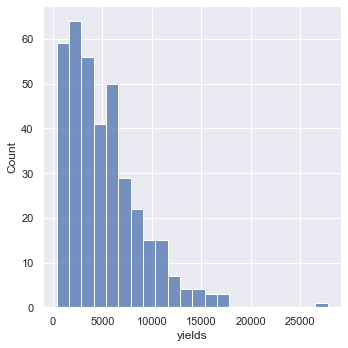

In [22]:
print(dframeFinal['yields'].kurt())
print(dframeFinal['yields'].skew())
sns.displot(dframeFinal['yields'])

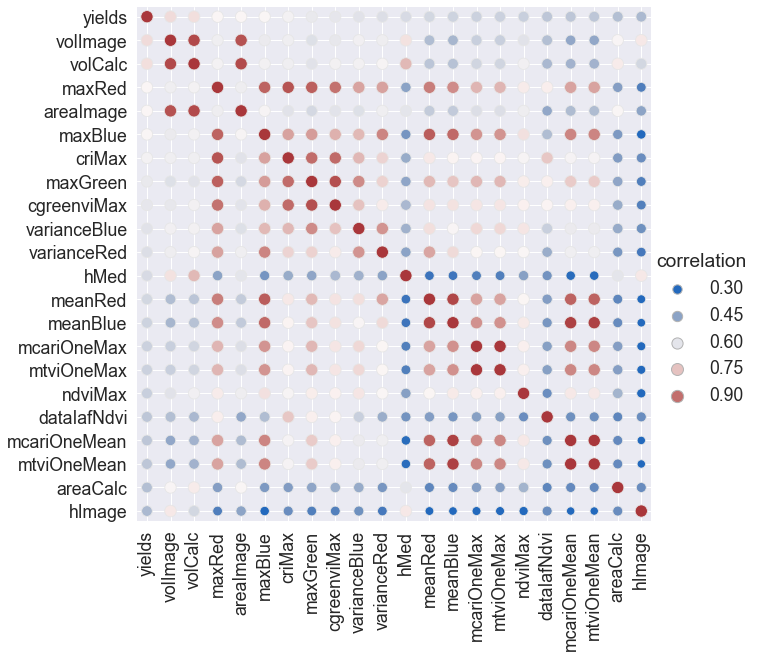

In [23]:
cols= correlation.nlargest(22,"yields")["yields"].index
cm= np.corrcoef(dataframe[cols].values.T)
sns.set(font_scale=1.6)
corr_mat = dataframe[cols].corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(0.3, 1), edgecolor=".9",
    height=10, sizes=(25, 150), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")



<h1> GRAFICAS DE VARIANZAS DE BANDAS</h1>

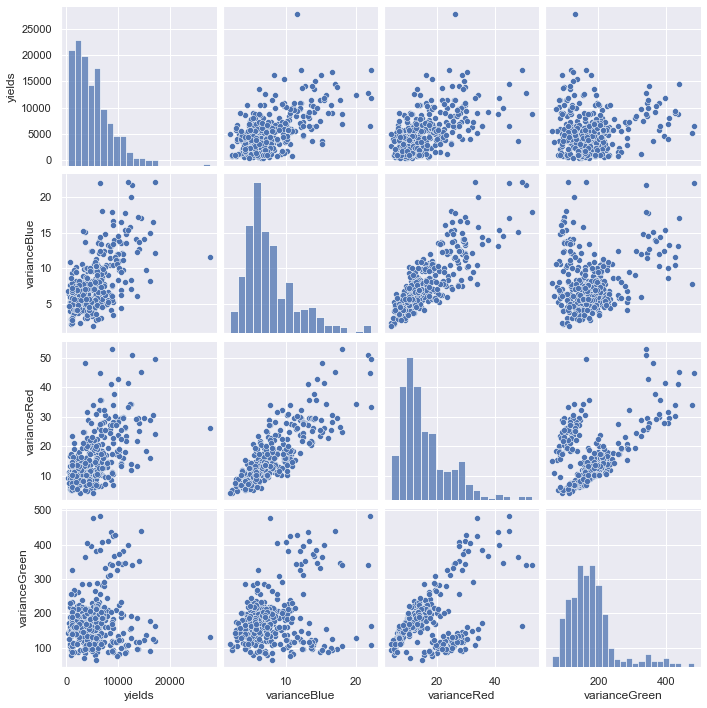

In [24]:

sns.set()
colsVariance = ["yields","varianceBlue","varianceRed","varianceGreen"]
sns.pairplot(dataframe[colsVariance],height=2.5,palette="muted",diag_kind="hist")
pyplot.show()

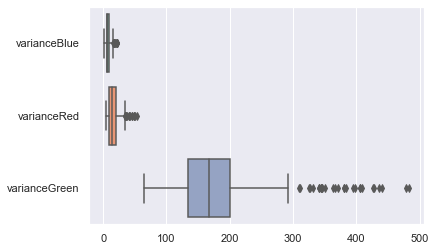

In [25]:
colsVariance = ["varianceBlue","varianceRed","varianceGreen"]
ax = sns.boxplot(data=dataframe[colsVariance], orient="h", palette="Set2")

<h1> GRAFICA DE NDVI </h1>

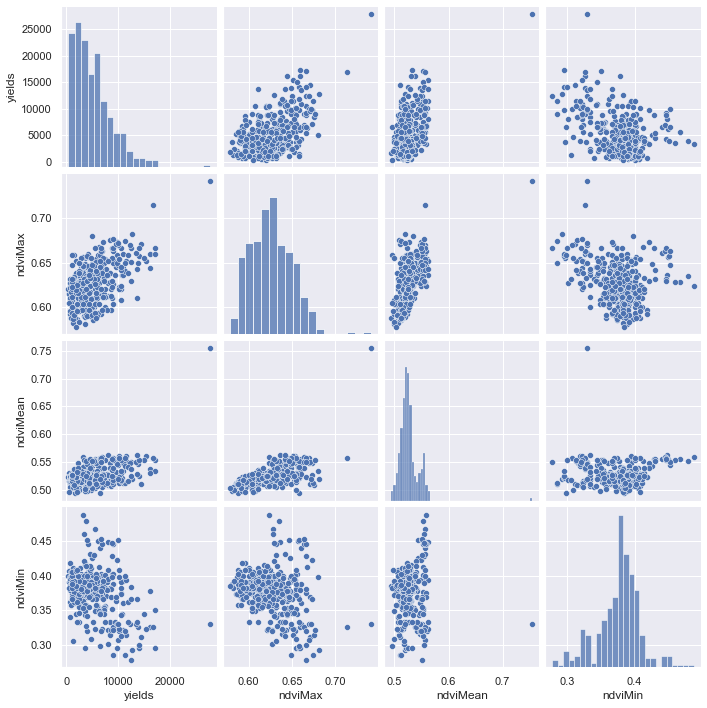

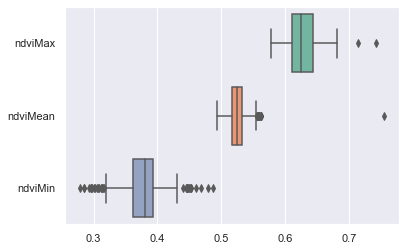

In [26]:
sns.set()
colsNdvi = ["yields","ndviMax","ndviMean","ndviMin"]
sns.pairplot(dataframe[colsNdvi],height=2.5)
pyplot.show()

colsVariance = ["ndviMax","ndviMean","ndviMin"]
ax = sns.boxplot(data=dataframe[colsVariance], orient="h", palette="Set2")

<h1>GRAFICA DE BANDAS</h1>

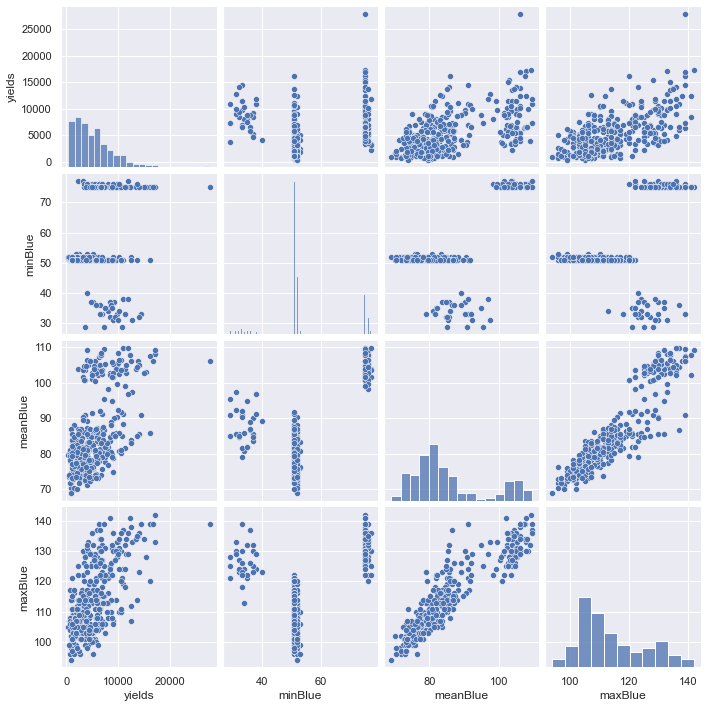

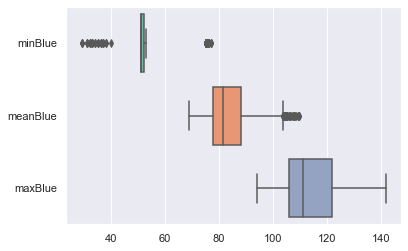

In [27]:
sns.set()
colsBlue = ["yields","minBlue","meanBlue","maxBlue"]
sns.pairplot(dataframe[colsBlue],height=2.5)
pyplot.show()

colsBlue = ["minBlue","meanBlue","maxBlue"]
ax = sns.boxplot(data=dataframe[colsBlue], orient="h", palette="Set2")

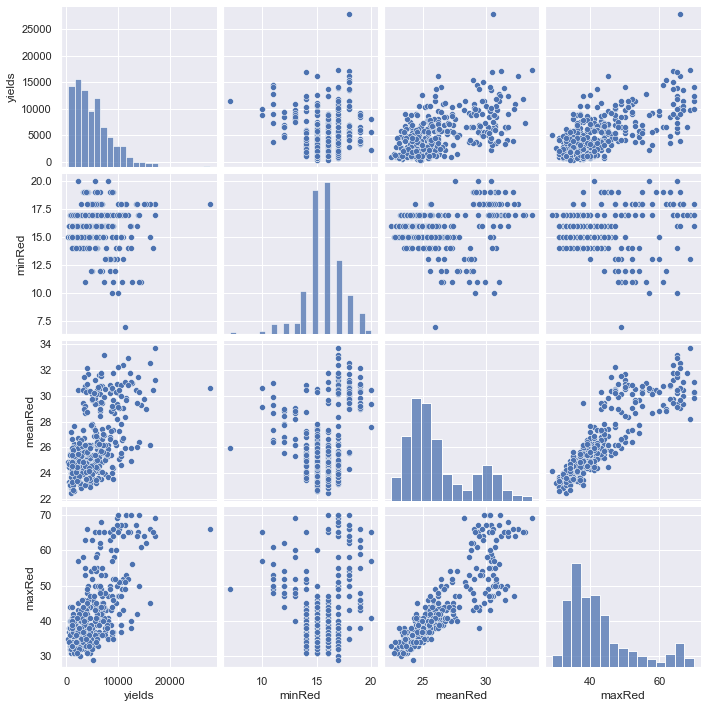

In [28]:
sns.set()
colsRed = ["yields","minRed","meanRed","maxRed"]
sns.pairplot(dataframe[colsRed],height=2.5)
pyplot.show()

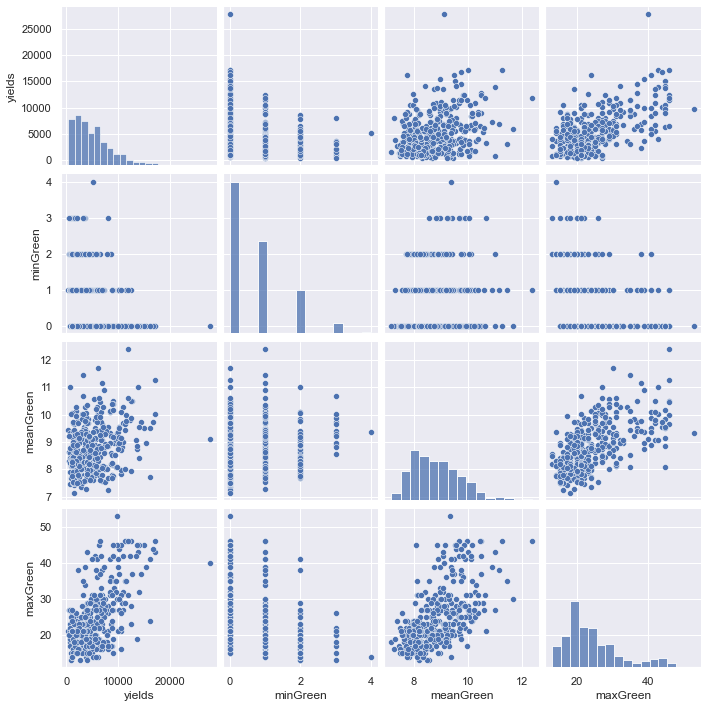

In [29]:
sns.set()
colsGreen = ["yields","minGreen","meanGreen","maxGreen"]
sns.pairplot(dataframe[colsGreen],height=2.5)
pyplot.show()

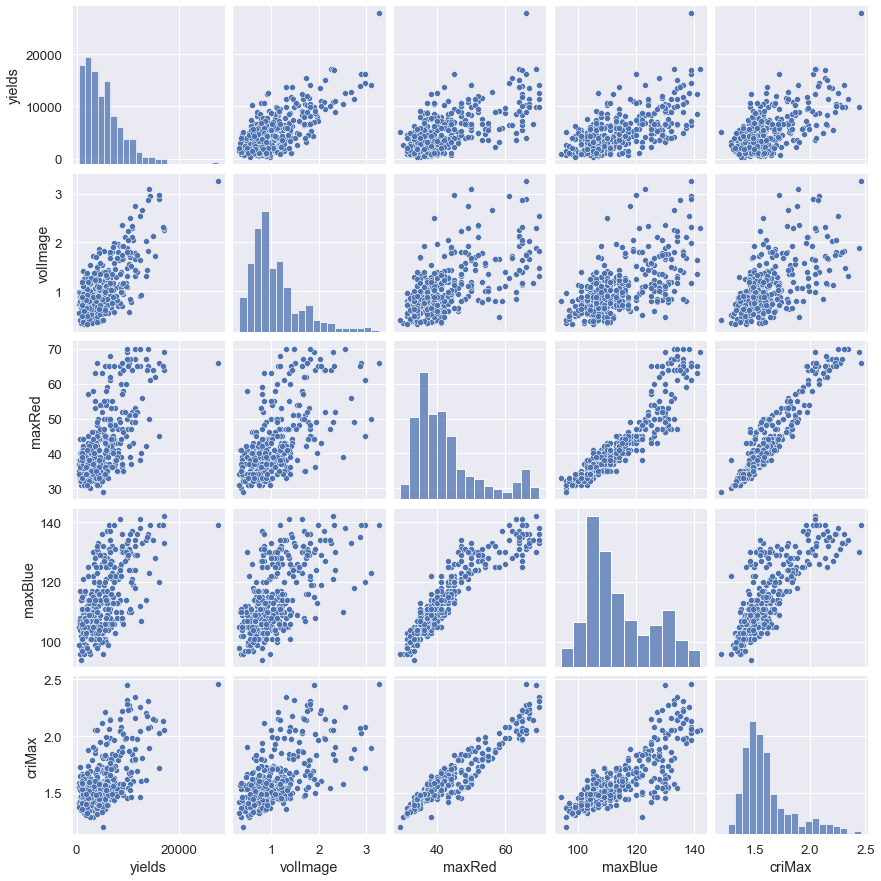

In [30]:
sns.set(font_scale=1.2)
colsGreen = ["yields",'volImage', 'maxRed', 'maxBlue','criMax']
sns.pairplot(dataframe[colsGreen],height=2.5)
pyplot.show()

<h1>NORMALIZE</h1>

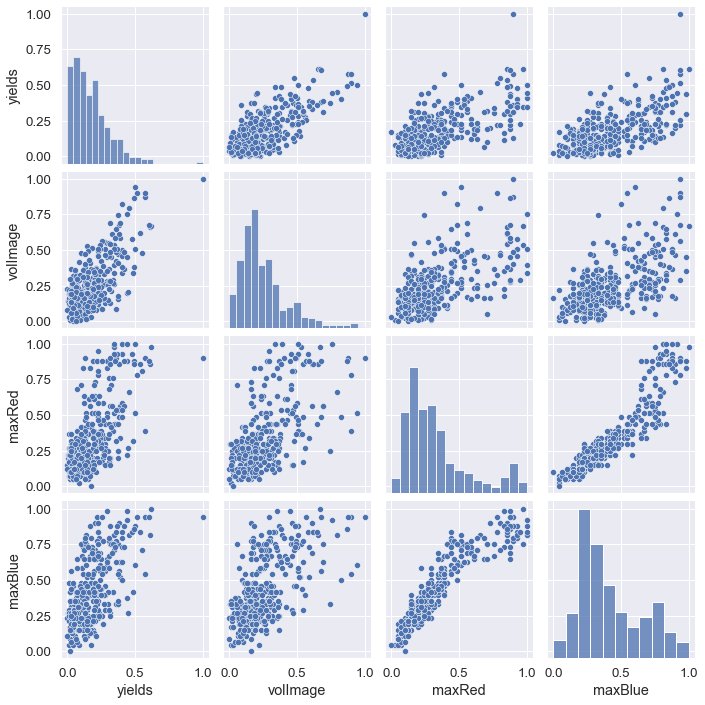

In [31]:
from sklearn.preprocessing import MinMaxScaler
colsRelations = ['yields','volImage', 'maxRed', 'maxBlue']
x = dataframe[colsRelations]
min_max_scaler = MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = colsRelations
sns.pairplot(df,height=2.5)


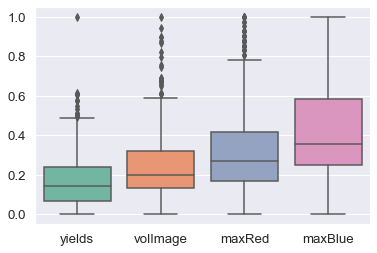

In [32]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")